<a href="https://colab.research.google.com/github/SamRus34/labAI/blob/main/student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploader = files.upload()

Saving exams.csv to exams.csv


In [ ]:
# импортируем модуль os
import os
# выводим пути к папкам (dirpath) и наименования файлов (filenames) и после этого
for dirpath, _, filenames in os.walk('/content/'):
# во вложенном цикле проходимся по названиям файлов
  for filename in filenames:
# и соединяем путь до папок и входящие в эти папки файлы
# с помощью метода path.join()
    print(os.path.join(dirpath, filename))

/content/test.csv
/content/exams.csv
/content/.config/.last_update_check.json
/content/.config/active_config
/content/.config/config_sentinel
/content/.config/.last_survey_prompt.yaml
/content/.config/.last_opt_in_prompt.yaml
/content/.config/gce
/content/.config/default_configs.db
/content/.config/logs/2024.01.11/17.01.50.905438.log
/content/.config/logs/2024.01.11/17.01.50.107332.log
/content/.config/logs/2024.01.11/17.01.23.878355.log
/content/.config/logs/2024.01.11/17.01.40.683538.log
/content/.config/logs/2024.01.11/17.01.32.816172.log
/content/.config/logs/2024.01.11/17.00.57.357130.log
/content/.config/configurations/config_default
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_test.csv


# New Section

In [ ]:
!ls

exams.csv  sample_data	test.csv


In [ ]:
!ls /content/sample_data/

anscombe.json		     california_housing_train.csv  mnist_train_small.csv
california_housing_test.csv  mnist_test.csv		   README.md


In [ ]:
file = open('/content/exams.csv', 'r')
print(file.read(35))
file.close()

"gender","race/ethnicity","parental


In [ ]:
file = open('/content/exams.csv', 'r')
for i, line in enumerate(file):
  print(line.strip())
  if i ==3:
    break
file.close()

"gender","race/ethnicity","parental level of education","lunch","test preparation course","math score","reading score","writing score"
"female","group D","some college","standard","completed","59","70","78"
"male","group D","associate's degree","standard","none","96","93","87"
"female","group D","some college","free/reduced","none","57","76","77"


In [ ]:
import pandas as pd
file = pd.read_csv('/content/exams.csv')
file.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77


In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<Axes: xlabel='gender', ylabel='count'>

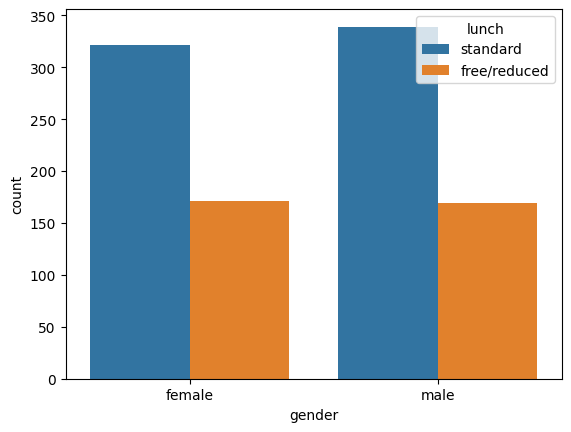

In [ ]:
import seaborn as sns
sns.countplot(x = 'gender', hue = 'lunch', data = file)

<Axes: xlabel='race/ethnicity', ylabel='count'>

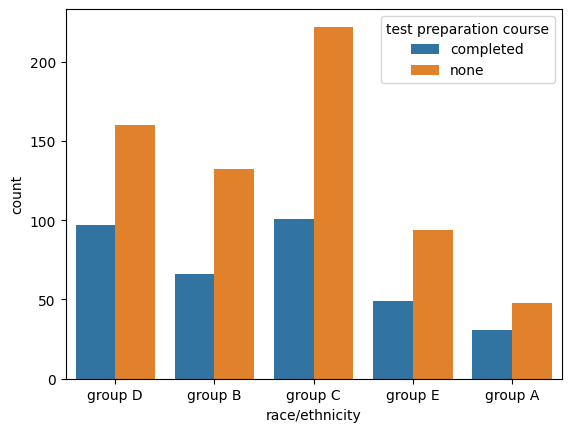

In [ ]:
import seaborn as sns
sns.countplot(x = 'race/ethnicity', hue = 'test preparation course', data = file)

In [ ]:
file.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
file.drop(columns = 'race/ethnicity', axis = 1, inplace = True)
file.drop(columns = 'parental level of education', axis = 1, inplace = True)

In [ ]:
file.columns = file.columns.str.replace(' ', '_')

if 'ID' not in file.columns:
  file.insert(0, 'ID', file.index + 1)

gender = pd.get_dummies(file['gender'], prefix='gender', drop_first=True)
lunch = pd.get_dummies(file['lunch'], prefix='lunch', drop_first=True)
test_preparation_course = pd.get_dummies(file['test_preparation_course'], prefix='test_preparation_course', drop_first=True)

file.drop(['gender', 'lunch', 'test_preparation_course'], axis=1, inplace=True)

file = pd.concat([file, gender, lunch, test_preparation_course], axis=1)

file.head(3)

,ID,math_score,reading_score,writing_score,gender_male,lunch_standard,test_preparation_course_none
0,1,59,70,78,0,1,0
1,2,96,93,87,1,1,1
2,3,57,76,77,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols_to_scale = ['math_score', 'reading_score', 'writing_score']
scaler.fit(file[cols_to_scale])

file[cols_to_scale] = scaler.transform(file[cols_to_scale])

file.head(3)

,ID,math_score,reading_score,writing_score,gender_male,lunch_standard,test_preparation_course_none
0,1,-0.577987,-0.027092,0.589943,0,1,0
1,2,1.849426,1.604073,1.189208,1,1,1
2,3,-0.709198,0.398430,0.523358,0,0,1


In [ ]:
x_student = file.drop('gender_male', axis = 1)
y_student = file['gender_male']
x_student.head(3)

,ID,math_score,reading_score,writing_score,lunch_standard,test_preparation_course_none
0,1,-0.577987,-0.027092,0.589943,1,0
1,2,1.849426,1.604073,1.189208,1,1
2,3,-0.709198,0.398430,0.523358,0,1


In [ ]:
y_student

0      0
1      1
2      0
3      1
4      0
      ..
995    1
996    1
997    0
998    1
999    1
Name: gender_male, Length: 1000, dtype: uint8

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100000)
model.fit(x_student, y_student)
LogisticRegression()

LogisticRegression()

In [ ]:
y_pred_student = model.predict(x_student)

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_student, y_pred_student)

conf_matrix_df = pd.DataFrame(conf_matrix)
conf_matrix_df

,0,1
0,434,58
1,51,457


In [ ]:
conf_matrix_labels = pd.DataFrame(conf_matrix, columns = ['pred male', 'pred female'], index = ['fact male', 'fact female'])
conf_matrix_labels

,pred male,pred female
fact male,434,58
fact female,51,457


In [ ]:
round((434 + 457)/(434 + 457 + 58 + 51), 3)

0.891

In [ ]:
from sklearn.metrics import accuracy_score

model_accuracy = accuracy_score(y_student, y_pred_student)

round(model_accuracy, 3)

0.891

In [ ]:
from google.colab import files
uploader = files.upload()

Saving test.csv to test.csv


In [ ]:
test = pd.read_csv('/content/test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       500 non-null    object
 1   race/ethnicity               500 non-null    object
 2   parental level of education  500 non-null    object
 3   lunch                        500 non-null    object
 4   test preparation course      500 non-null    object
 5   math score                   500 non-null    int64 
 6   reading score                500 non-null    int64 
 7   writing score                500 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 31.4+ KB


In [ ]:
test.drop(columns = 'race/ethnicity', axis = 1, inplace = True)
test.drop(columns = 'parental level of education', axis = 1, inplace = True)

In [ ]:
test.columns = test.columns.str.replace(' ', '_')

if 'ID' not in test.columns:
  test.insert(0, 'ID', test.index + 1)

gender = pd.get_dummies(test['gender'], prefix='gender', drop_first=True)
lunch = pd.get_dummies(test['lunch'], prefix='lunch', drop_first=True)
test_preparation_course = pd.get_dummies(test['test_preparation_course'], prefix='test_preparation_course', drop_first=True)

test.drop(['gender', 'lunch', 'test_preparation_course'], axis=1, inplace=True)

test = pd.concat([test, gender, lunch, test_preparation_course], axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols_to_scale = ['math_score', 'reading_score', 'writing_score']
scaler.fit(test[cols_to_scale])

test[cols_to_scale] = scaler.transform(test[cols_to_scale])

In [ ]:
x_test = test.drop('gender_male', axis = 1)
y_test = test['gender_male']

In [ ]:
y_test

0      0
1      1
2      0
3      1
4      0
      ..
495    1
496    0
497    0
498    1
499    0
Name: gender_male, Length: 500, dtype: uint8

In [ ]:
x_test.columns = x_test.columns.map(str)

In [ ]:
y_pred_test = model.predict(x_test)

In [ ]:
y_pred_test[:10]

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0], dtype=uint8)

In [ ]:
ids = test['ID']
result = pd.DataFrame({'ID': ids, 'gender_male': y_pred_test})
result.head()

,ID,gender_male
0,1,0
1,2,1
2,3,0
3,4,1
4,5,0


In [ ]:
result.to_csv('result.csv', index = False)
print('Файл успешно сохранился в сессионное хранилище!')

Файл успешно сохранился в сессионное хранилище!


In [ ]:
files.download('/content/result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>